In [225]:
%matplotlib inline

%load_ext autoreload

%autoreload 2
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from auxiliary import *

np.random.seed(123)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Regression estimators of causal effects

We start with different ways of using regression

* descriptive tools
* estimating causal effects

## Regression as a descriptive tool

Goldberger (1991), for example, motivates least squares regression as a technique to estimate a best-fitting linear approximation to a conditional expectation function that may be nonlinear in the population.

<img src="material/regression_demonstration_one.png" height=300 width=300 />

In [226]:
df = get_sample_demonstration_1(num_agents=10000)
df.head()

,Y,D,S,Y_1,Y_0
0,7.047903,1,2,7.047903,5.254559
1,11.651437,0,3,13.421400,11.651437
2,13.795799,1,3,13.795799,11.979348
3,5.133260,0,2,9.265936,5.133260
4,5.380809,0,2,7.856628,5.380809


In [227]:
df.groupby(['D', 'S'])['Y'].mean()

D  S
0  1     2.019014
   2     6.017456
   3     9.977920
1  1     4.026830
   2     8.001276
   3    13.980587
Name: Y, dtype: float64

How does the functional form of the conditiional expectation look like?

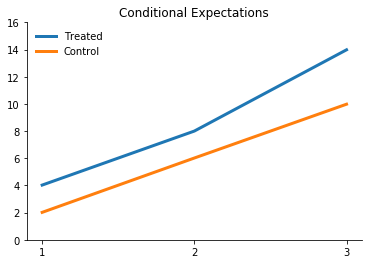

In [228]:
plot_conditional_expectation_demonstration_1(df)

# What does the difference between the two lines tell us about treatment effect heterogeneity?

We will fit four different prediction models using ordinary

\begin{align*}
&\hat{Y} = \beta_0 + \beta_1 D + \beta_3 S \\
&\hat{Y} = \beta_0 + \beta_1 D + \beta_3 S \\
&\hat{Y} = \beta_0 + \beta_1 D + \beta_3 S_1 + \beta_3 S_2 \\
&\hat{Y} = \beta_0 + \beta_1 D + \beta_3 S_1 + \beta_3 S_2 + \beta_3 S_1 * D + \beta_3 S_2 * D  
\end{align*}


In [229]:
rslt = smf.ols(formula='Y ~ D + S', data=df).fit()
rslt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 8.162e+04
Date:                Fri, 26 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:21:27   Log-Likelihood:                -15331.
No. Observations:               10000   AIC:                         3.067e+04
Df Residuals:                    9997   BIC:                         3.069e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6768      0.027   -100.048      0.000      -2.729      -2.624
D              2.6950      0.025    107.753      0.000       2.646       2.744
S              4.4325      0.014    313.055      0.000       4.405       4.460
==============================================================================
Omnibus:                        5.215   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                5.016
Skew:                          -0.031   Prob(JB):                       0.0814
Kurtosis:                       2.910   Cond. No.                         6.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [230]:
df['predict'] = rslt.predict()
df.groupby(['D', 'S'])['Y', 'predict'].mean()

Y    predict
D S                      
0 1   2.019014   1.755647
  2   6.017456   6.188111
  3   9.977920  10.620575
1 1   4.026830   4.450685
  2   8.001276   8.883149
  3  13.980587  13.315613

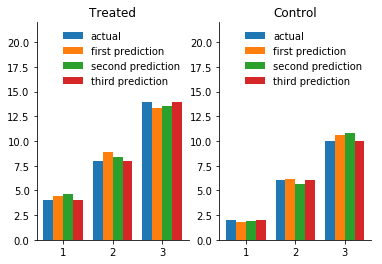

In [231]:
plot_predictions_demonstration_1(df)

## Regression adjustment as a strategy to estimate causal effects

### Regression models and omitted-variable bias

<img src="material/omitted-variable-bias.png" height=300 width=300 />


### Potential outcomes and omitted-variable bias

### Regression as adjustment for otherwise omitted variables

<img src="material/observable-regression-adjustment.png" height=300 width=300 />


<img src="material/regression_demonstration_one.png" height=300 width=300 />
<img src="material/regression_demonstration_two.png" height=300 width=300 />
<img src="material/regression_demonstration_three.png" height=300 width=300 />
<img src="material/regression_demonstration_four.png" height=300 width=300 />
<img src="material/regression_demonstration_five.png" height=300 width=300 />